In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

def plot_percentage(df, x, y):   
    counts = df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()
    print(counts)
    sns.catplot(x=x, y='percent', hue=y, data=counts, kind='bar')
    plt.show()

df = pd.read_csv('ze_final.csv')

In [2]:
df = df[df['centro'] == 'CCS']


**Perfil dos Estudantes na Amostra**

- 50% evadiram
- 80% possuem cidade de origem diferente da cidade do campus
- 67% são do sexo feminino
- Idade média dos estudantes é 22

In [5]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['event'].value_counts(normalize=True))

0    0.506842
1    0.493158
Name: event, dtype: float64


In [6]:
idx = (df['time'] == df.groupby('matricula')['time'].transform('max'))

print(df[idx]['is_outra_cidade'].value_counts(normalize=True))

print(df[idx]['sexo'].value_counts(normalize=True))

print(df[idx]['idade'].mean())


1    0.799124
0    0.200876
Name: is_outra_cidade, dtype: float64
0    0.675972
1    0.324028
Name: sexo, dtype: float64
22.400656814449917


**Taxa de evasão é maior para estudantes cuja origem difere da cidade do campus?**

- Não há evidência

   is_outra_cidade  event    percent
0                0      0  50.953678
1                0      1  49.046322
2                1      0  50.616438
3                1      1  49.383562


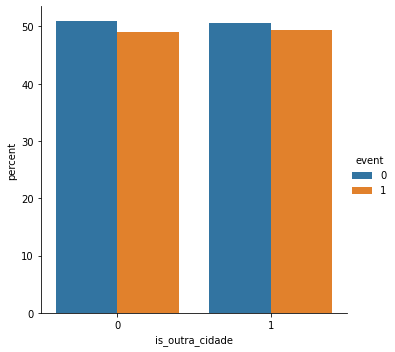

In [7]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

#print(df[idx]['is_outra_cidade'].value_counts(normalize=True))

plot_percentage(df[idx], 'is_outra_cidade', 'event')

**Taxa de evasão é maior para ingressantes no 1o semestre?**

- Não há evidência

1    0.516694
2    0.483306
Name: semestreIngresso, dtype: float64


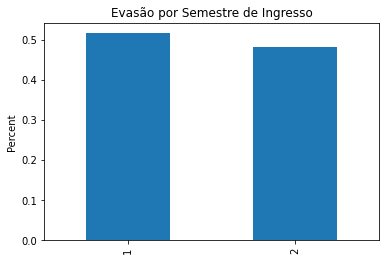

In [8]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')
counts = df.loc[idx, 'semestreIngresso'].value_counts(normalize=True)
print(counts)

ax = counts.plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão por Semestre de Ingresso')
plt.show()


1    0.516694
2    0.483306
Name: semestreIngresso, dtype: float64
   semestreIngresso  event    percent
0                 1      0  54.343220
1                 1      1  45.656780
2                 2      1  53.227633
3                 2      0  46.772367


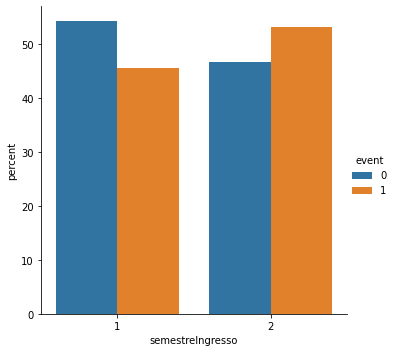

In [9]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['semestreIngresso'].value_counts(normalize=True))

plot_percentage(df[idx], 'semestreIngresso', 'event')

**Taxa de evasão no 2o semestre letivo é maior?**

- Não há evidências

2    0.609323
1    0.390677
Name: semestreLetivo, dtype: float64


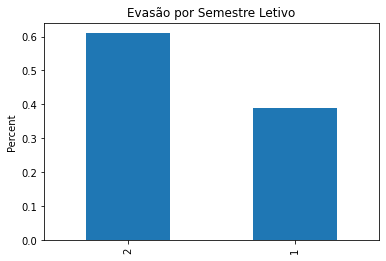

In [10]:
idx = df['event'] == 1

counts = df.loc[idx, 'semestreLetivo'].value_counts(normalize=True)
print(counts)

ax = counts.plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão por Semestre Letivo')
plt.show()


2    0.525999
1    0.474001
Name: semestreLetivo, dtype: float64
   semestreLetivo  event    percent
0               1      0  59.353349
1               1      1  40.646651
2               2      1  57.127992
3               2      0  42.872008


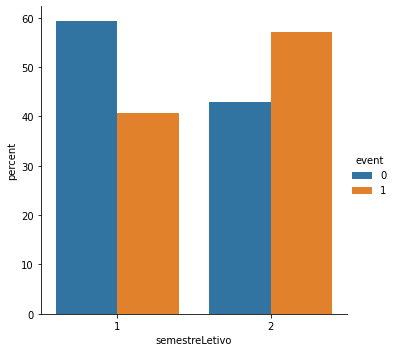

In [12]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['semestreLetivo'].value_counts(normalize=True))

plot_percentage(df[idx], 'semestreLetivo', 'event')

**Há interação entre evasão e o sexo do estudante?**

- Não há evidências
- Com o tempo, há evidências de que a taxa de evasão entre homens cresce após atingir valor mínimio (v-shape)

0    0.630411
1    0.369589
Name: sexo, dtype: float64


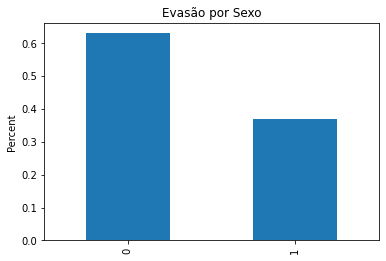

In [13]:
idx = df['event'] == 1

counts = df.loc[idx, 'sexo'].value_counts(normalize=True)
print(counts)

ax = counts.plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão por Sexo')
plt.show()

0    0.675972
1    0.324028
Name: sexo, dtype: float64
   sexo  event    percent
0     0      0  54.008097
1     0      1  45.991903
2     1      1  56.250000
3     1      0  43.750000


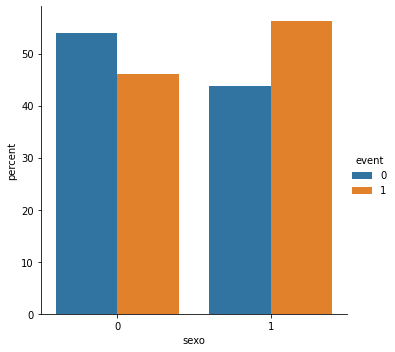

In [14]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['sexo'].value_counts(normalize=True))

plot_percentage(df[idx], 'sexo', 'event')

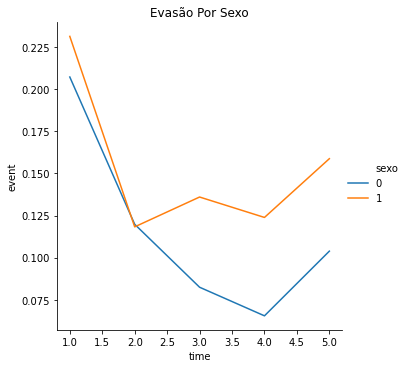

In [15]:
data = df.groupby(['time','sexo']).agg({'event':'mean'}).reset_index()
ax = sns.relplot(x='time', y='event', data=data, hue='sexo',  kind="line")    
ax.set(title='Evasão Por Sexo')    

**Como se comporta a taxa de evasão com o tempo?**

- A taxa de evasão tende a decrescer com o tempo

[Text(0.5, 1.0, 'Evasão Geral')]

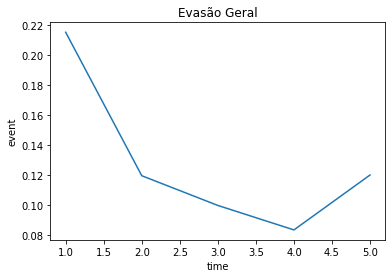

In [16]:
data = df.groupby('time').agg({'event':'mean'}).reset_index()

ax = sns.lineplot(x='time', y='event', data=data)    
ax.set(title='Evasão Geral')

**Há diferenças entre cota e ampla concorrência?**

- Não há evidências

0    0.518336
1    0.481664
Name: is_cotista, dtype: float64
   is_cotista  event    percent
0           0      0  50.897571
1           0      1  49.102429
2           1      0  50.454545
3           1      1  49.545455


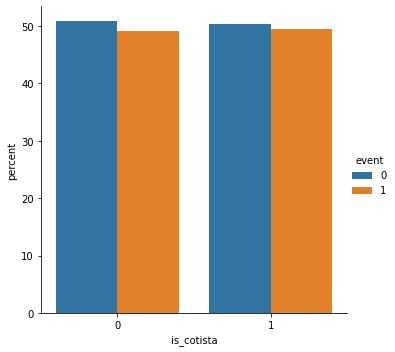

In [18]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['is_cotista'].value_counts(normalize=True))

plot_percentage(df[idx], 'is_cotista', 'event')

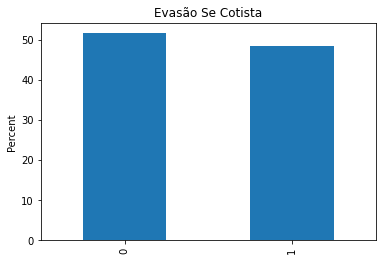

In [19]:
idx = df['event'] == 1

ax = df.loc[idx, 'is_cotista'].value_counts(normalize=True).mul(100).plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão Se Cotista')
plt.show()

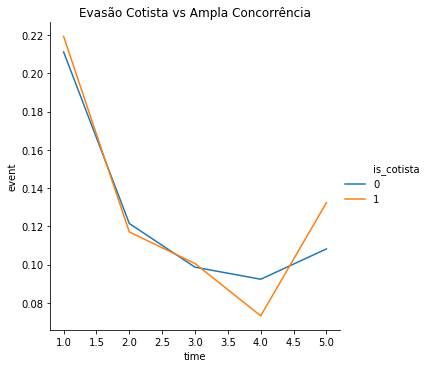

In [20]:
data = df.groupby(['time','is_cotista']).agg({'event':'mean'}).reset_index()
ax = sns.relplot(x='time', y='event', data=data, hue='is_cotista',  kind="line")    
ax.set(title='Evasão Cotista vs Ampla Concorrência')    

**A idade de ingresso afeta a taxa de evasão?**

- Há indícios de que a taxa de evasão aumenta conforme a idade de ingresso aumenta

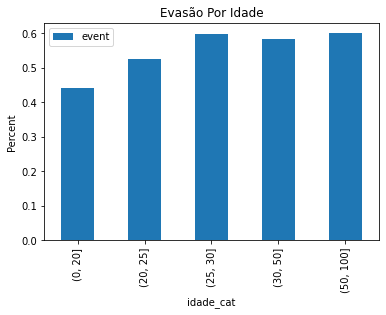

In [21]:
col = 'idade_cat'
df[col] = pd.cut(df.idade, bins=[0,20,25,30,50,100])

idx = df['time'] == df.groupby('matricula')['time'].transform('max')


ax = df[idx].groupby(col).agg({'event':'mean'}).plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão Por Idade')
plt.show()

**Gap (tempo entre o término do ensino médio e o ingresso no curso) afeta a evasão?**

- Há indícios de que a taxa de evasão aumenta conforme o gap aumenta

(0.0, 1.0]      0.298028
(1.0, 2.0]      0.191549
(10.0, 43.0]    0.109859
(2.0, 3.0]      0.108169
(3.0, 4.0]      0.083944
(4.0, 5.0]      0.059155
(5.0, 6.0]      0.046761
(6.0, 7.0]      0.036620
(7.0, 8.0]      0.026479
(8.0, 9.0]      0.022535
(9.0, 10.0]     0.016901
Name: gap_cat, dtype: float64


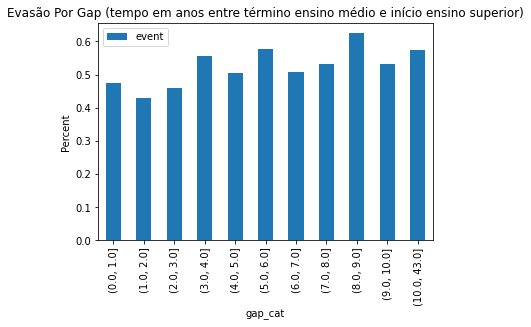

In [22]:
col = 'gap_cat'
df[col] = pd.cut(df.gap, bins=[0,1,2,3,4,5,6,7,8,9,10, df.gap.max()])

idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx][col].value_counts(normalize=True))

ax = df[idx].groupby(col).agg({'event':'mean'}).plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão Por Gap (tempo em anos entre término ensino médio e início ensino superior)')
plt.show()